# Feature Points Detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = './data/images' # Change this, according to your images' directory path

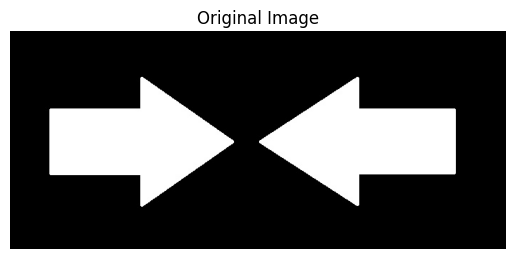

In [2]:
filename = 'corners_01.jpg'
img = cv2.imread(os.path.join(imagesDir, filename))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

og_img = img.copy() # let's copy the image to be able to use it later without having to read it again

## Corner Detection

[Harris Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345)

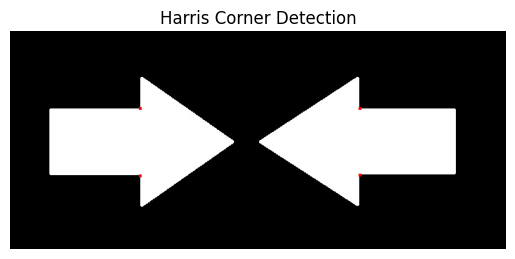

In [8]:
def harrisCornerDetection(currImg, neighbourhood, aperture, free_param, thr):
    gray = cv2.cvtColor(currImg, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    dst = cv2.cornerHarris(gray, neighbourhood, aperture, free_param)

    # result is dilated for marking the corners, not important
    dst = cv2.dilate(dst, None)

    currImg[dst > thr*dst.max()] = [0,0,255]

    # convert to RGB for plotting with matplotlib
    out = cv2.cvtColor(currImg, cv2.COLOR_BGR2RGB)

    plt.imshow(out)
    plt.title('Harris Corner Detection')
    plt.axis('off')
    plt.show()

harrisCornerDetection(img.copy(), 2, 3, 0.08, 0.01)

[Shi-Tomasi Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)

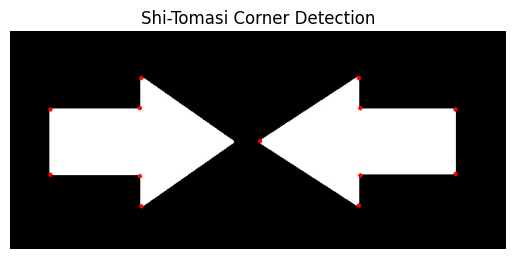

In [11]:
def shiTomasiCornerDetection(currImg, neighbourhood, free_param, max_corners, quality, mindist):
    # Save copy of original image
    img2 = currImg.copy()

    gray = cv2.cvtColor(currImg, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    corners = cv2.goodFeaturesToTrack(gray, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
    corners = np.int0(corners)

    for i in corners:
        x,y = i.ravel()
        cv2.circle(img2, (x,y), 3, 255, -1)
        
    plt.imshow(img2)
    plt.title('Shi-Tomasi Corner Detection')
    plt.axis('off')
    plt.show()

shiTomasiCornerDetection(img.copy(), 2, 0.08, 200, 0.2, 10)

[FAST Corner Detector](https://docs.opencv.org/4.x/df/d74/classcv_1_1FastFeatureDetector.html)

Threshold: 10
NMS:True
Neighborhood: 2
Total Keypoints with NMS: 14


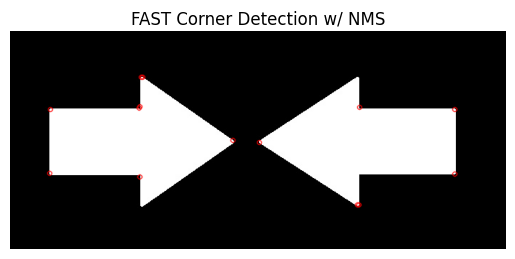

Total Keypoints without NMS: 92


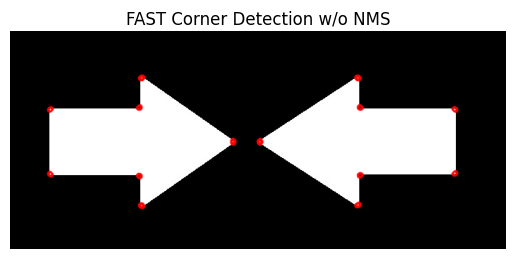

In [6]:
def fastCornerDetection(currImg):
    # Initiate FAST object with default values
    fast = cv2.FastFeatureDetector_create()

    # find and draw the keypoints
    kp = fast.detect(currImg, None)
    img3 = cv2.drawKeypoints(currImg, kp, None, color=(255,0,0))

    # Print all default params
    print("Threshold: {}".format(fast.getThreshold()))
    print("NMS:{}".format(fast.getNonmaxSuppression()))
    print("Neighborhood: {}".format(fast.getType()))
    print("Total Keypoints with NMS: {}".format(len(kp)))

    plt.imshow(img3)
    plt.title('FAST Corner Detection w/ NMS')
    plt.axis('off')
    plt.show()

    # Disable NMS
    fast.setNonmaxSuppression(0)
    kp = fast.detect(currImg, None)
    print("Total Keypoints without NMS: {}".format(len(kp)))
    img4 = cv2.drawKeypoints(currImg, kp, None, color=(255,0,0))

    plt.imshow(img4)
    plt.title('FAST Corner Detection w/o NMS')
    plt.axis('off')
    plt.show()

fastCornerDetection(img.copy())

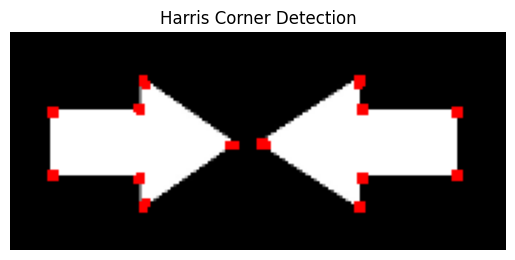

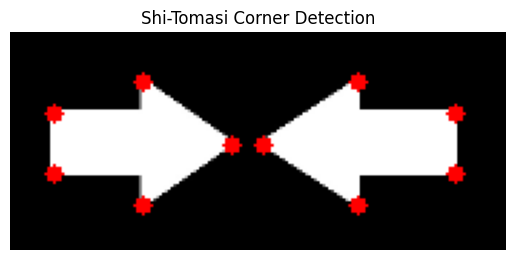

Threshold: 10
NMS:True
Neighborhood: 2
Total Keypoints with NMS: 7


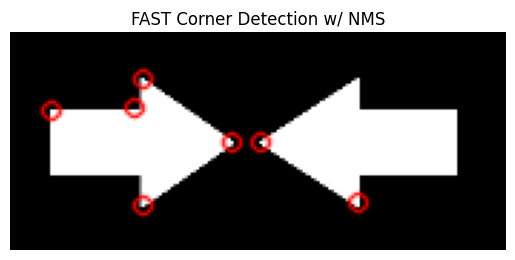

Total Keypoints without NMS: 101


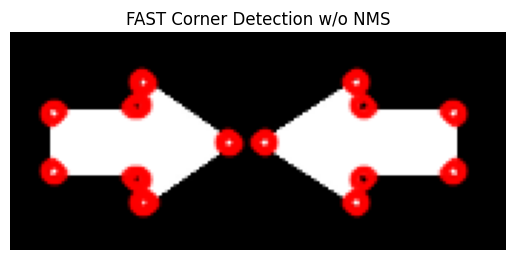

In [12]:
# 9d) Resize the images, downsizing them to 1/4 of their original size and reapply the corner detection algorithms

# Resize the image to 1/4 of its original size
small_img = cv2.resize(img, (0,0), fx=0.25, fy=0.25)

# Apply the corner detection algorithms
harrisCornerDetection(small_img.copy(), 2, 3, 0.08, 0.01)
shiTomasiCornerDetection(small_img.copy(), 2, 0.08, 200, 0.2, 10)
fastCornerDetection(small_img.copy())


## Blob Detection

[SIFT Blob Detector](https://docs.opencv.org/4.x/d7/d60/classcv_1_1SIFT.html)

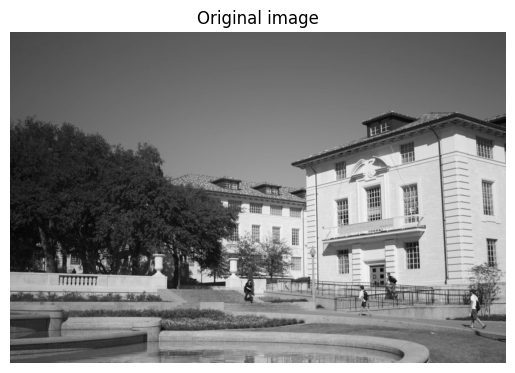

In [13]:
new_img = cv2.imread(os.path.join(imagesDir, 'stitch_building01_1.png'))
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

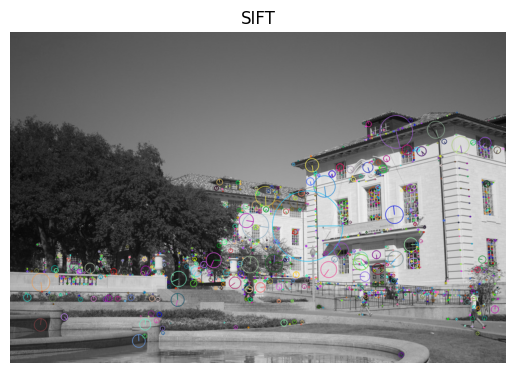

In [22]:
# Initiate SIFT detector
constrastThreshold = 0.1
sift = cv2.SIFT_create(contrastThreshold=constrastThreshold)

# find the keypoints
kp = sift.detect(gray, None)

# draw the keypoints (with size and orientation)
sift_img = cv2.drawKeypoints(gray, kp, new_img, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(sift_img)
plt.title('SIFT')
plt.axis('off')
plt.show()

[Orb Blob Detector](https://docs.opencv.org/4.x/db/d95/classcv_1_1ORB.html)

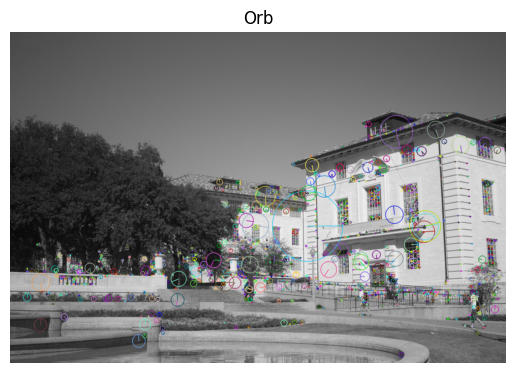

In [25]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(new_img, None)

# compute the descriptors with ORB
kp, des = orb.compute(new_img, kp)

# draw only keypoints location, not size and orientation
orb_img = cv2.drawKeypoints(new_img, kp, None, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(orb_img)
plt.title('Orb')
plt.axis('off')
plt.show()

## Matching

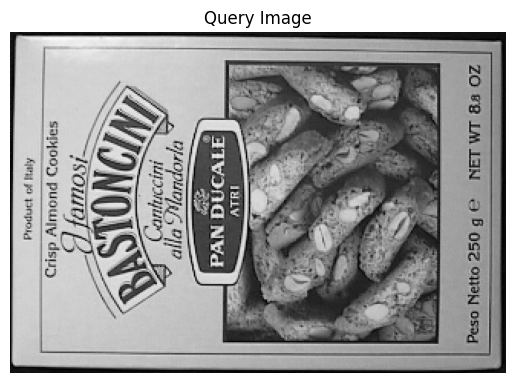

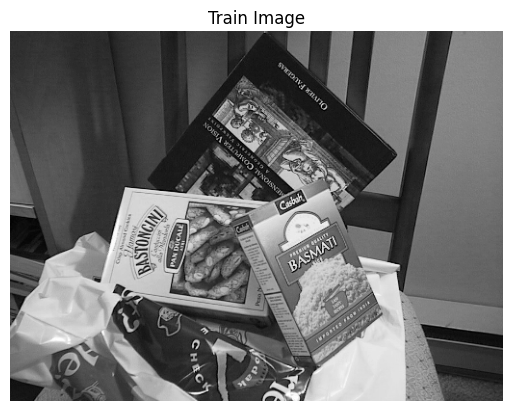

In [46]:
query = cv2.imread(os.path.join(imagesDir, 'match_box01a_1.png'), cv2.IMREAD_GRAYSCALE) # queryImage
train = cv2.imread(os.path.join(imagesDir, 'match_box01a_2.png'), cv2.IMREAD_GRAYSCALE) # trainImage

plt.imshow(query, cmap='gray')
plt.title('Query Image')
plt.axis('off')
plt.show()

plt.imshow(train, cmap='gray')
plt.title('Train Image')
plt.axis('off')
plt.show()

plt.show()

In [47]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(query, None)
kp2, des2 = orb.detectAndCompute(train, None)

# Find the keypoints and descriptors with SIFT
sift = cv2.SIFT_create()
kp1_sift, des1_sift = sift.detectAndCompute(query, None)
kp2_sift, des2_sift = sift.detectAndCompute(train, None)

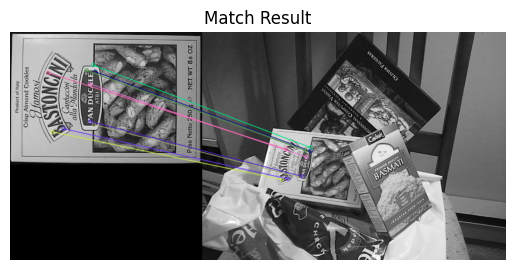

In [35]:
# Create a Brute Force Matcher object
# NORM_HAMMING is used for ORB since it is a binary descriptor. 
# CrossCheck is used to ensure that the keypoints are only matched if they are the best match for each other in each image. 
crossCheck = False
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)   

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first numMatches matches.
numMatches = 10
match_output = cv2.drawMatches(query, kp1, train, kp2, matches[:numMatches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(match_output)
plt.title('Match Result')
plt.axis('off')
plt.show()

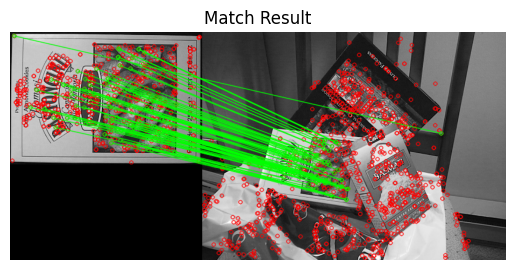

In [56]:
def flann_matcher(des1, des2, kp1, kp2):
    # Create a FLANN matcher object
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)   # or pass empty dictionary

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    # Match descriptors using FLANN 
    matches = flann.knnMatch(des1, des2, k=2)

    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    # ratio test as per Lowe's paper
    for i, (m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i] = [1,0]

    draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = cv2.DrawMatchesFlags_DEFAULT)

    matchOut = cv2.drawMatchesKnn(query, kp1, train, kp2, matches, None, **draw_params)

    plt.imshow(matchOut)
    plt.title('Match Result')
    plt.axis('off')
    plt.show()

flann_matcher(des1_sift, des2_sift, kp1_sift, kp2_sift)

Local Features + Homography - Localizing Objects

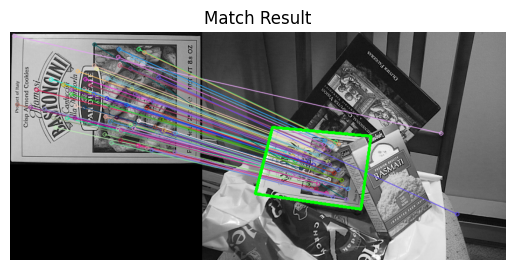

In [3]:
# Read images in grayscale
img_query = cv2.imread(os.path.join(imagesDir, 'match_box01a_1.png'), cv2.IMREAD_GRAYSCALE) # queryImage
img_train = cv2.imread(os.path.join(imagesDir, 'match_box01a_2.png'), cv2.IMREAD_GRAYSCALE) # trainImage
if img_query is None or img_train is None:
    print('Could not open or find the images!')
    exit(0)

# Step 1 - Detect the keypoints using a detector, compute the descriptors
# In this case, we will use the SIFT detector and descriptor
sift = cv2.SIFT_create()
# kp -> List of keypoints
# desc -> Numpy array of shape (number of keypoints, 128) - descriptors
kp_query, desc_query = sift.detectAndCompute(img_query, None)
kp_train, desc_train = sift.detectAndCompute(img_train, None)

# Step 2 - Match the descriptors using a matcher
# In this case, we will use a FLANN matcher
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)   # or pass empty dictionary
matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.knnMatch(desc_query, desc_train, k=2)

# Step 3 - Select the good matches using a ratio test
# In this case, we will use the Lowe's ratio test
ratio_thresh = 0.75
good_matches = []
for m, n in matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

# Draw the matches & returns an output image that concatenates the two input images and draws the matches
matchOut = cv2.drawMatches(img_query, kp_query, img_train, kp_train, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Step 4 - Localize the object
obj = np.empty((len(good_matches), 2), dtype=np.float32)
scene = np.empty((len(good_matches), 2), dtype=np.float32)
for i in range(len(good_matches)):
    # Get the keypoints from the good matches
    obj[i, 0] = kp_query[good_matches[i].queryIdx].pt[0]
    obj[i, 1] = kp_query[good_matches[i].queryIdx].pt[1]
    scene[i, 0] = kp_train[good_matches[i].trainIdx].pt[0]
    scene[i, 1] = kp_train[good_matches[i].trainIdx].pt[1]

# Find the homography matrix
H, _ = cv2.findHomography(obj, scene, cv2.RANSAC)

# Get the corners from the query image (the object to be "detected") 
# Creating a numpy array of shape (4, 1, 2) - 4 corners, 1 point, 2 coordinates. For some reason, this is the format that cv2.perspectiveTransform() expects
obj_corners = np.empty((4, 1, 2), dtype=np.float32)
# Top left
obj_corners[0, 0, 0] = 0
obj_corners[0, 0, 1] = 0
# Top right
obj_corners[1, 0, 0] = img_query.shape[1]
obj_corners[1, 0, 1] = 0
# Bottom right
obj_corners[2, 0, 0] = img_query.shape[1]
obj_corners[2, 0, 1] = img_query.shape[0]
# Bottom left
obj_corners[3, 0, 0] = 0
obj_corners[3, 0, 1] = img_query.shape[0]

# Transform the corners from the query image into the scene image
scene_corners = cv2.perspectiveTransform(obj_corners, H)

# Draw the lines between the corners (the mapped object in the scene image)
# The img_query.shape[1] is added to the x coordinates of the corners in the scene image to offset them to the right image (the scene image)
# top left -> top right
p1 = (int(scene_corners[0, 0, 0] + img_query.shape[1]), int(scene_corners[0, 0, 1]))
p2 = (int(scene_corners[1, 0, 0] + img_query.shape[1]), int(scene_corners[1, 0, 1]))
cv2.line(matchOut, p1, p2, (0, 255, 0), 4)

# top right -> bottom right
p1 = (int(scene_corners[1, 0, 0] + img_query.shape[1]), int(scene_corners[1, 0, 1]))
p2 = (int(scene_corners[2, 0, 0] + img_query.shape[1]), int(scene_corners[2, 0, 1]))
cv2.line(matchOut, p1, p2, (0, 255, 0), 4)

# bottom right -> bottom left
p1 = (int(scene_corners[2, 0, 0] + img_query.shape[1]), int(scene_corners[2, 0, 1]))
p2 = (int(scene_corners[3, 0, 0] + img_query.shape[1]), int(scene_corners[3, 0, 1]))
cv2.line(matchOut, p1, p2, (0, 255, 0), 4)

# bottom left -> top left
p1 = (int(scene_corners[3, 0, 0] + img_query.shape[1]), int(scene_corners[3, 0, 1]))
p2 = (int(scene_corners[0, 0, 0] + img_query.shape[1]), int(scene_corners[0, 0, 1]))
cv2.line(matchOut, p1, p2, (0, 255, 0), 4)

# Show the detected matches
plt.imshow(matchOut)
plt.title('Match Result')
plt.axis('off')
plt.show()
